# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Visualizando-vários-mapeamentos" data-toc-modified-id="Visualizando-vários-mapeamentos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizando vários mapeamentos</a></div><div class="lev2 toc-item"><a href="#Utilizando-sua-função-feita-no-exercício-proposto" data-toc-modified-id="Utilizando-sua-função-feita-no-exercício-proposto-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Utilizando sua função feita no exercício proposto</a></div><div class="lev2 toc-item"><a href="#Modelos-de-cores" data-toc-modified-id="Modelos-de-cores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Modelos de cores</a></div><div class="lev2 toc-item"><a href="#Visualizando-na-tabela-inserida-a-transformação-de-intensidade-feita" data-toc-modified-id="Visualizando-na-tabela-inserida-a-transformação-de-intensidade-feita-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizando na tabela inserida a transformação de intensidade feita</a></div><div class="lev2 toc-item"><a href="#Implementação-da-Correção-Gama" data-toc-modified-id="Implementação-da-Correção-Gama-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Implementação da Correção Gama</a></div><div class="lev2 toc-item"><a href="#Visualizando-com-outras-tabelas-de-cores" data-toc-modified-id="Visualizando-com-outras-tabelas-de-cores-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualizando com outras tabelas de cores</a></div><div class="lev2 toc-item"><a href="#Referências" data-toc-modified-id="Referências-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Referências</a></div>

# Visualizando vários mapeamentos 

Quando visualizamos uma imagem, seja na tela do computador ou impresso em papel, existe sempre
uma transformação ou mapeamento de intensidade que é aplicado na imagem. Uma forma simples de visualizar qual
foi esta transformação consiste em incluir na imagem uma rampa de pixels com os valores que você quer
verificar qual é a transformação aplicada.

Nesta atividade iremos fazer isto. Nossas imagens em níveis de cinza estão armazenadas em 8 bits sem sinal ("uint8")
variando de 0 a 255. A ideia é incluir uma rampa vertical de valores entre 0 e 255 diretamente na matriz da imagem
utilizando a função que você fez na atividade anterior. 

Para entender melhor como se usa uma função feita em outra página do Adessowiki, veja o breve tutorial:

- [Criando módulos Python no Adessowiki](../master/tutorial_1_modulo.ipynb)

## Utilizando sua função feita no exercício proposto

A seguir, a função é utilizada para visualizar a imagem com a rampa de cinza. Veja o comando de
importação: ``import activity_mariecp_3_tc as my``.

Depois de feita a função ``tc_insertion``, descomente a linha de importação da função abaixo:

In [1]:
#import activity_mariecp_3_tc as my

Depois de feita a função ``tc_insertion``, descomente as linhas de criação e display de ``fr`` a seguir:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

""
""

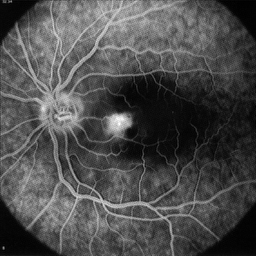

In [18]:
f = mpimg.imread('../data/retina.tif')
ia.adshow(f)
#fr = my.tc_insertion(f)
#adshow(fr)

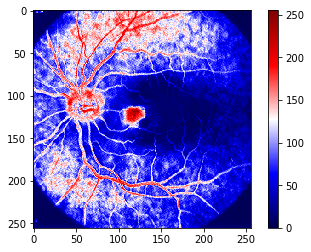

In [4]:
plt.imshow(f,cmap='seismic')
plt.colorbar()

## Modelos de cores

- Modelo RGB
- Modelo HSV

In [5]:
import colorsys

s = colorsys.rgb_to_hsv(128,128,0)
print(s)

(0.16666666666666666, 1.0, 128)


(256, 256)


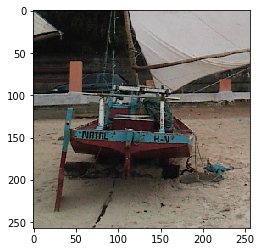

In [23]:
fb = mpimg.imread('../data/boat.tif')
print(f.shape)
r = fb[:,:,0].ravel()
g = fb[:,:,1].ravel()
b = fb[:,:,2].ravel()
plt.imshow(fb)

In [24]:
g = map(colorsys.rgb_to_hsv, r, g, b)
ga=np.array(list(g)).reshape(fb.shape)
print(ga.shape)
M = ga.max(axis=0).max(axis=0)
m = ga.min(axis=0).min(axis=0)
print(M)

(257, 256, 3)
[   0.99702381    1.          218.        ]


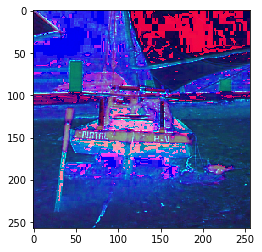

In [25]:
plt.imshow(ga)

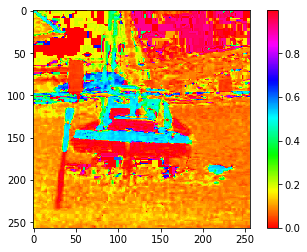

In [26]:
H = ga[:,:,0]
S = ga[:,:,1]
V = ga[:,:,2]
plt.imshow(H,cmap='hsv')
plt.colorbar()

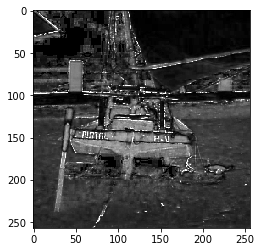

In [27]:
plt.imshow(S,cmap='gray')

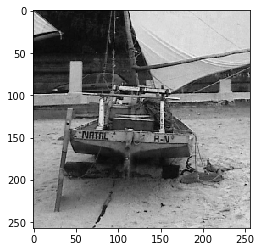

In [28]:
plt.imshow(V,cmap='gray')

## Visualizando na tabela inserida a transformação de intensidade feita

A seguir refazemos as 5 tabelas do tutorial:

- [Transformações de Intensidade](../master/tutorial_ti_2.ipynb)

e visualizamos cada caso.
Descomente as linhas que utilizam as imagem ``fr`` a seguir para visualizar a imagem transformada com a
rampa inserida. Observe que a rampa inserida, como ela contém os valores de 0 a 255 na imagem, ela funciona como
uma escala de cores, para saber exatamente qual é a cor que aparece no display da imagem.

In [29]:
# Tabelas feitas no tutorial
T1 = np.arange(256).astype('uint8') # função identidade
T2 = ia.normalize(np.log(T1+1.)) # logaritmica - realce partes escuras
T3 = 255 - T1 # negativo
T4 = 255 * (T1 > 128).astype('uint8') # threshold 128
T5 = ia.normalize(T1//64) # reduz o número de níveis de cinza

""
realce logarítmico

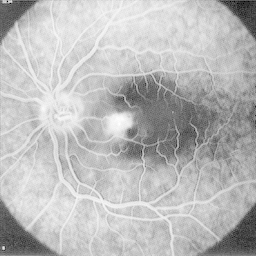

In [30]:
f2 = T2[f]
#f2r = T2[fr]

ia.adshow(f2,'realce logarítmico')
#adshow(f2r, 'vizualização com rampa')

""
negativo

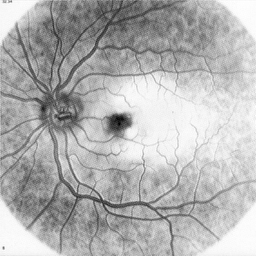

In [31]:
f3 = T3[f]
#f3r = T3[fr]

ia.adshow(f3,'negativo')
#adshow(f3r, 'visualização com rampa')

""
threshold 128

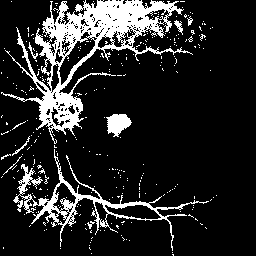

In [32]:
f4 = T4[f]
#f4r = T4[fr]

ia.adshow(f4,'threshold 128')
#adshow(f4r, 'visualização com rampa')

""
redução n. de cinzas

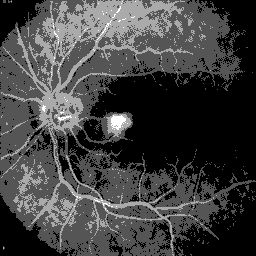

In [33]:
f5 = T5[f]
#f5r = T5[fr]

ia.adshow(f5,'redução n. de cinzas')
#adshow(f5r, 'visualização com rampa')

## Implementação da Correção Gama

Implemente aqui função de correção Gama, muito 
utilizada para correção de displays. Veja maiores informações em

- [Wikipedia: Gamma correction](http://en.wikipedia.org/wiki/Gamma_correction)

A equação da função de correção Gama é:

$$    T[v] = v^{\gamma} \text{para}\ v \in [0,255] $$

Onde: $\gamma$ é o fator de correção. Quando $\gamma$ é 1.0 não existe 
alteração, se $\gamma < 1$ aumenta o contraste nas áreas escuras e 
$\gamma > 1$, ocorre o contrário.

Implemente a transformação de correção Gama, de forma similar à feita para a 
transformação ``T2`` acima e aplique na imagem, com vários valores de Gama:

In [9]:
# Crie Tg de forma parecida com T2
# Tg = ia.normalize(  )
# plote
# plt.plot(Tg), plt.title('Tg gama=0.5')
# aplique na imagem: 
# fgr = Tg[fr]
# mostre-a: 
# ia.adshow(fgr, 'correção gama')

## Visualizando com outras tabelas de cores

Nos exemplos a seguir, a imagem é mapeada em tabelas de cores de forma que cada nível de cinza da
imagem original é mapeada em três imagens R, G, B no modelo colorido RGB. Isto não é assunto deste curso
mas serve de exemplificação.

Troque o uso da imagem ``f`` abaixo pela imagem ``fr`` que contém a rampa:

In [10]:
cm1 = ia.colormap('hsv')
f_cm1 = ia.applylut(f, cm1)
ia.adshow(f_cm1, 'hsv')

ValueError: total size of new array must be unchanged

In [11]:
cm2 = ia.colormap('hot')
f_cm2 = ia.applylut(f, cm2)
ia.adshow(f_cm2, 'hot')

/home/adessowiki/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


IndexError: axis 1 out of bounds [0, 1)

""
cool

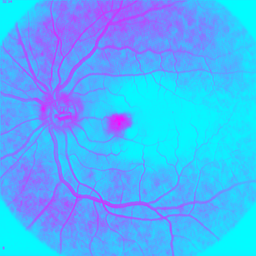

In [16]:
cm2 = ia.colormap('cool')
f_cm2 = ia.applylut(f, cm2)
f_cm2 = f_cm2.astype('uint8')
if len(f_cm2.shape)==3:
    f_cm2 = f_cm2.transpose(1,2,0)

ia.adshow(f_cm2, 'cool')

""
copper

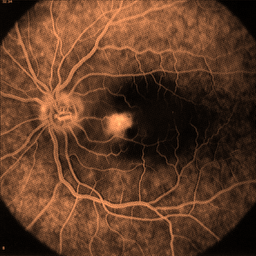

In [17]:
cm2 = ia.colormap('copper')
f_cm2 = ia.applylut(f, cm2)
f_cm2 = f_cm2.astype('uint8')
if len(f_cm2.shape)==3:
    f_cm2 = f_cm2.transpose(1,2,0)

ia.adshow(f_cm2, 'copper')

In [13]:
cm2 = ia.colormap('bone')
f_cm2 = ia.applylut(f, cm2)
ia.adshow(f_cm2, 'bone')

/home/adessowiki/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


IndexError: axis 1 out of bounds [0, 1)

In [14]:
cm2 = ia.colormap('pink')
f_cm2 = ia.applylut(f, cm2)
adshow(f_cm2, 'pink')

/home/adessowiki/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


IndexError: axis 1 out of bounds [0, 1)

## Referências

- [ia898:colormap](../../ia898/src/colormap.ipynb)
- [matplotlib:colormap](http://matplotlib.org/examples/color/colormaps_reference.html)